#2. Consider the in-built IRIS dataset and do the following:


##A. Visualize the dataset using a plot and apply k-Nearest Neighbour algorithm on the dataset
###Calculate the following evaluation metrics  
- Accuracy
- Precision
- Recall
- F1 Score
- Confusion Matrix 

###Discuss what you observe

###Visualizing the inbuilt iris dataset

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np

In [ ]:
iris = datasets.load_iris()

print(" The features in this dataset are ", iris.feature_names)

 The features in this dataset are  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
X_sepal = iris.data[:, :2]  # we only take the first two features.
X_petal = iris.data[:, -2:]  # we only take the last two features.
X = iris.data
y = iris.target

#0.5 is for translating so all points can be seen in the graph
x_min_sepal_length, x_max_sepal_length = X_sepal[:, 0].min() - .5, X_sepal[:, 0].max() + .5 
y_min_sepal_width, y_max_sepal_width = X_sepal[:, 1].min() - .5, X_sepal[:, 1].max() + .5

x_min_petal_length, x_max_petal_length = X_petal[:, 0].min() - .5, X_petal[:, 0].max() + .5
y_min_petal_width, y_max_petal_width = X_petal[:, 1].min() - .5, X_petal[:, 1].max() + .5

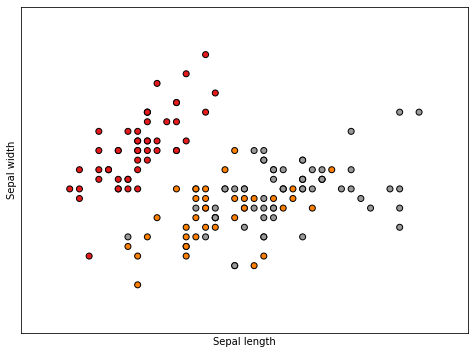

In [ ]:
plt.figure(figsize=(8, 6))
plt.clf()
# Plot the training points
plt.scatter(X_sepal[:, 0], X_sepal[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min_sepal_length, x_max_sepal_length)
plt.ylim(y_min_sepal_width, y_max_sepal_width)
plt.xticks(())
plt.yticks(())
plt.show()

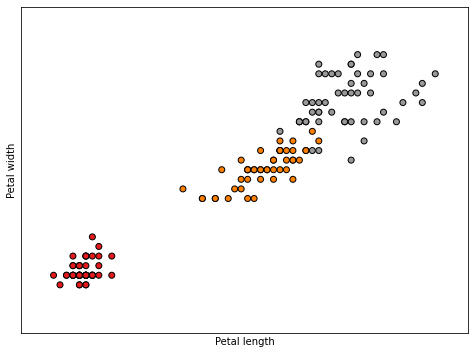

In [ ]:
plt.figure(figsize=(8, 6))
plt.clf()
# Plot the training points
plt.scatter(X_petal[:, 0], X_petal[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.xlim(x_min_petal_length, x_max_petal_length)
plt.ylim(y_min_petal_width, y_max_petal_width)
plt.xticks(())
plt.yticks(())
plt.show()

<function matplotlib.pyplot.show>

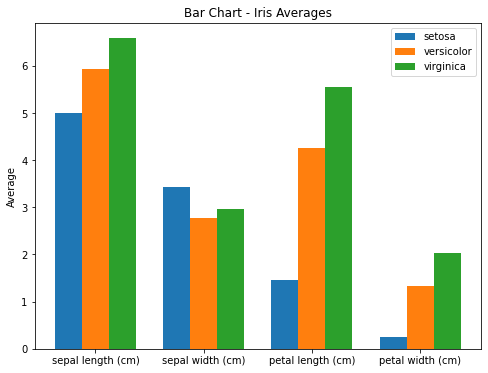

In [ ]:
n_classes = 3
averages = [X[y == i].mean(axis=0) for i in range(n_classes)]
x = np.arange(len(iris.feature_names))

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()
bar1 = ax.bar(x - 0.25, averages[0], 0.25, label=iris.target_names[0])
bar2 = ax.bar(x, averages[1], 0.25, label=iris.target_names[1])
bar3 = ax.bar(x + 0.25, averages[2], 0.25, label=iris.target_names[2])
ax.set_xticks(x)
ax.set_xticklabels(iris.feature_names)

plt.legend()
plt.title("Bar Chart - Iris Averages")
plt.ylabel("Average")
plt.show

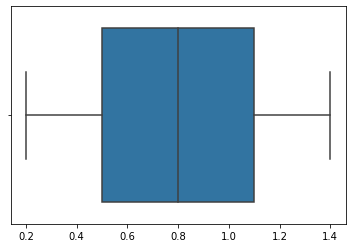

In [ ]:
import seaborn as sns
sns.boxplot(x=X_petal[0]) #petal length


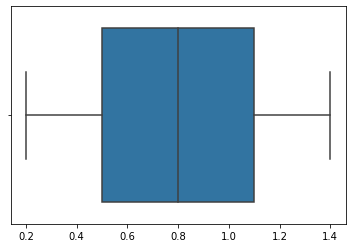

In [ ]:
sns.boxplot(x=X_petal[1]) #petal width

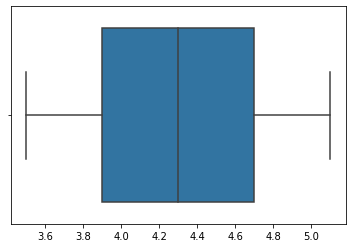

In [ ]:
sns.boxplot(x=X_sepal[0]) #sepal length

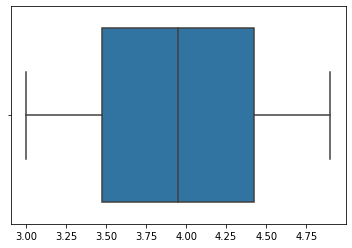

In [ ]:
sns.boxplot(x=X_sepal[1] ) #sepal width

###kNN on iris data set

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=25)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("Accuracy with K = 25:",metrics.accuracy_score(y_test, y_pred))

Accuracy with K = 25: 0.9473684210526315


Minimum error:- 0.02631578947368421 at K = 7


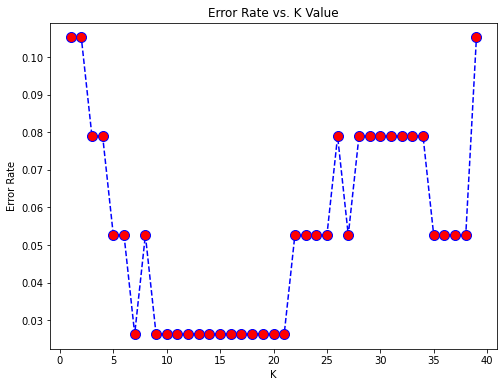

In [ ]:
#@title
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(8,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)) + 1)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9736842105263158


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[12  0  0]
 [ 0 14  0]
 [ 0  1 11]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



###Observation

On splitting the Inbuilt iris dataset (containing a total of 150 samples) into 75-25 train-test sets and applying K-nearest neighbour algorithm over the dataset, using the optimal value of k = 7 ( found using min. error technique) we get the following values of evalutation metrics:

- Accuracy => 97.37%
- Precision => 98%
- Recall => 97%
- f1 score => 97%
- Confusion Matrix :

 **[12,   0,   0]**\
 **[ 0,  14,  0]**\
 **[ 0,  1,  11]**

 ----
We can observe from the values of the evaluation metrics that the kNN algorithm on iris dataset will be able to predict the iris species with high accuracy, precisionand recall. Since the f1 score is also high, we can be sure that the accuracy value is not based on any imbalance affect the result.
The confusion matrix shows us that out of 38 samples in the test data set:
- 12 samples were of the *setosa* species and all of them were predicted correctly
- 14 samples were of the *versicolor* species and all of them were predicted correctly
- 12 samples were of the *virginica* species and 11 of them were predicted correctly and one of them has been labelled wrongly as belonging to the *versicolor* species





## B. Apply Pearson and Spearman Correlation Coefficient, and try to find out whether you can drop any feature (Drop a feature only when the correlation is above 90%)

In [ ]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y = pd.DataFrame(iris.target)
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
species_list = iris.target_names
print("Types of species: %s\n" % species_list)
print("Dataset length: %i\n" % len(df))
# https://www.kaggle.com/danalexandru/simple-analysis-of-iris-dataset

Types of species: ['setosa' 'versicolor' 'virginica']

Dataset length: 150



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f435fb8eeb8>,
      dtype=object)

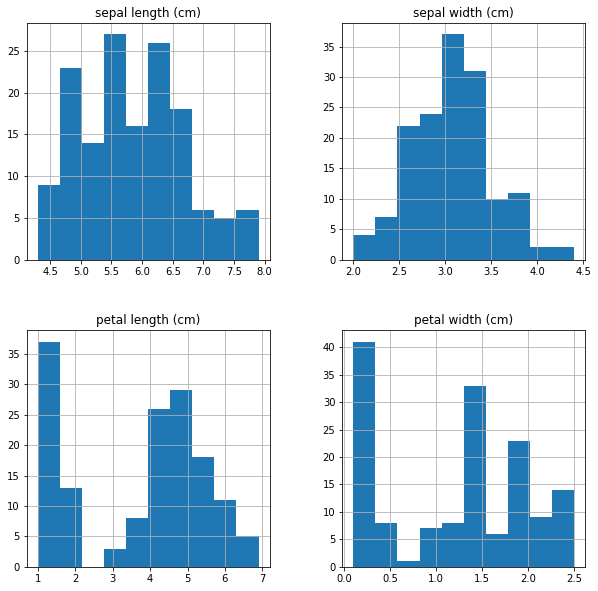

In [ ]:
df.hist(column=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"],
    figsize=(10, 10)
    #,sharey=True, sharex=True
)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,NaN,NaN,NaN
sepal width (cm),-0.117570,1.000000,NaN,NaN
petal length (cm),0.871754,-0.428440,1.000000,NaN
petal width (cm),0.817941,-0.366126,0.962865,1.0


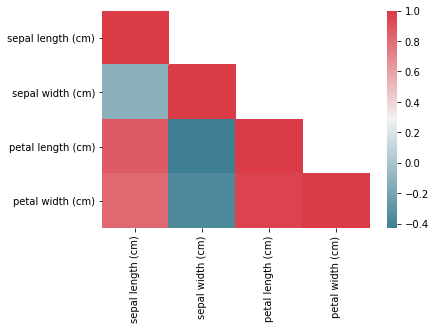

In [ ]:
import seaborn as sns
# method : {‘pearson’, ‘spearman’}
corr = df.corr(method="pearson")

bool_upper_matrix = np.tril(np.ones(corr.shape)).astype(np.bool)
corr = corr.where(bool_upper_matrix)
display(corr)

sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,NaN,NaN,NaN
sepal width (cm),-0.166778,1.000000,NaN,NaN
petal length (cm),0.881898,-0.309635,1.000000,NaN
petal width (cm),0.834289,-0.289032,0.937667,1.0


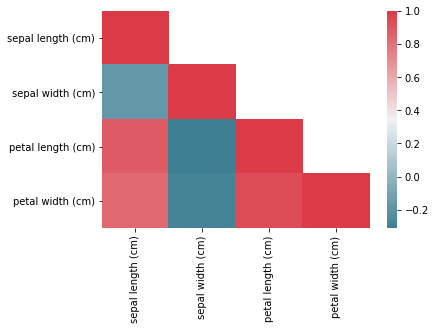

In [ ]:

corr = df.corr(method="spearman")

bool_upper_matrix = np.tril(np.ones(corr.shape)).astype(np.bool)
corr = corr.where(bool_upper_matrix)
display(corr)

sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Petal length shows a correlation of more than 90% to petal width and hence can be dropped

##C. Apply Principal Component Analysis on the dataset created in Section “2. b” and try to  reduce the number  of  features,  if  possible; Then, repeat Section  “2.a” with  the identified principal component axeses

Load the dataset

In [ ]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
db = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [ ]:
db['target']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: target, Length: 150, dtype: object

In [ ]:
df['target'] = db['target']
df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  ...  petal width (cm)          target
0                  5.1               3.5  ...               0.2     Iris-setosa
1                  4.9               3.0  ...               0.2     Iris-setosa
2                  4.7               3.2  ...               0.2     Iris-setosa
3                  4.6               3.1  ...               0.2     Iris-setosa
4                  5.0               3.6  ...               0.2     Iris-setosa
..                 ...               ...  ...               ...             ...
145                6.7               3.0  ...               2.3  Iris-virginica
146                6.3               2.5  ...               1.9  Iris-virginica
147                6.5               3.0  ...               2.0  Iris-virginica
148                6.2               3.4  ...               2.3  Iris-virginica
149                5.9               3.0  ...               1.8  Iris-virginica

[150 rows

In [ ]:
df.rename(columns = {'sepal length (cm)':'sepal length', 'sepal width (cm)':'sepal width', 'petal length (cm)':'petal length', 'petal width (cm)':'petal width'}, inplace = True)

Dropping the petal length column

In [ ]:
df.drop(['petal length'], axis = 1)

,sepal length,sepal width,petal width,target
0,5.1,3.5,0.2,Iris-setosa
1,4.9,3.0,0.2,Iris-setosa
2,4.7,3.2,0.2,Iris-setosa
3,4.6,3.1,0.2,Iris-setosa
4,5.0,3.6,0.2,Iris-setosa
...,...,...,...,...
145,6.7,3.0,2.3,Iris-virginica
146,6.3,2.5,1.9,Iris-virginica
147,6.5,3.0,2.0,Iris-virginica
148,6.2,3.4,2.3,Iris-virginica


Standardize the data

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

PCA Projection to 2D

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [ ]:
finalDf

,principal component 1,principal component 2,target
0,-1.831977,0.453813,Iris-setosa
1,-1.588417,-0.693305,Iris-setosa
2,-1.902486,-0.369849,Iris-setosa
3,-1.900197,-0.628285,Iris-setosa
4,-1.989012,0.615540,Iris-setosa
...,...,...,...
145,1.704392,0.422339,Iris-virginica
146,1.431284,-0.868204,Iris-virginica
147,1.278204,0.290593,Iris-virginica
148,0.998881,1.020896,Iris-virginica


Visualize 2D Projection

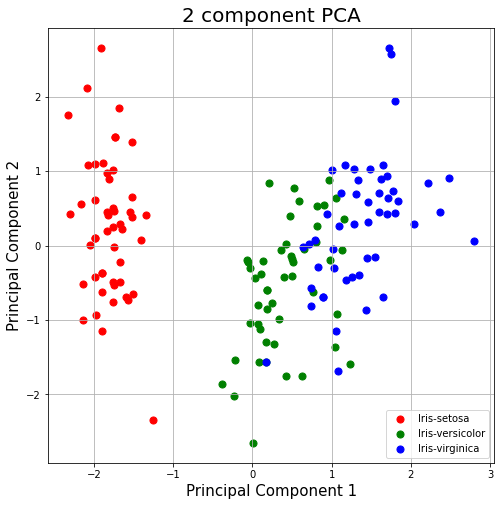

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
pca.explained_variance_ratio_

array([0.64806048, 0.30433105])

In [ ]:
finalDf

,principal component 1,principal component 2,target
0,-1.831977,0.453813,Iris-setosa
1,-1.588417,-0.693305,Iris-setosa
2,-1.902486,-0.369849,Iris-setosa
3,-1.900197,-0.628285,Iris-setosa
4,-1.989012,0.615540,Iris-setosa
...,...,...,...
145,1.704392,0.422339,Iris-virginica
146,1.431284,-0.868204,Iris-virginica
147,1.278204,0.290593,Iris-virginica
148,0.998881,1.020896,Iris-virginica


In [ ]:
pc1 = finalDf['principal component 1']
pc2 = finalDf['principal component 2']
tar = finalDf['target']

In [ ]:
db = pd.DataFrame(pc1)

In [ ]:
db['principal component 2'] = pc2

In [ ]:
X = db
y = tar

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

classifier = KNeighborsClassifier(n_neighbors=25)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("Accuracy with K = 25:",metrics.accuracy_score(y_test, y_pred))

Accuracy with K = 25: 0.8421052631578947


Minimum error:- 0.15789473684210525 at K = 6


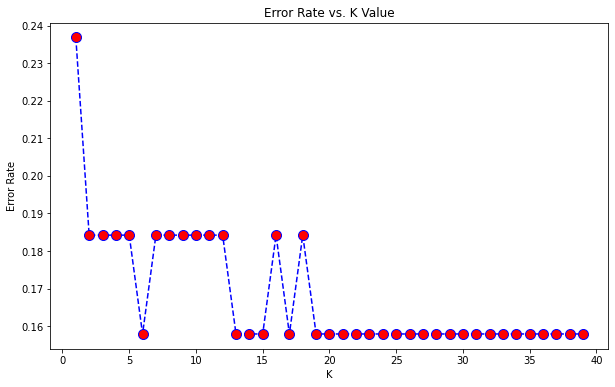

In [ ]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)) + 1)

In [ ]:


classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8421052631578947


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[12  0  0]
 [ 0 11  3]
 [ 0  3  9]]


In [ ]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.79      0.79      0.79        14
 Iris-virginica       0.75      0.75      0.75        12

       accuracy                           0.84        38
      macro avg       0.85      0.85      0.85        38
   weighted avg       0.84      0.84      0.84        38



###Observation

On splitting the Inbuilt iris dataset (containing a total of 150 samples) into 75-25 train-test sets and applying K-nearest neighbour algorithm over the dataset, using the optimal value of k = 6 ( found using min. error technique) we get the following values of evalutation metrics:

- Accuracy => 84.21%
- Precision => 85%
- Recall => 85%
- f1 score => 85%
- Confusion Matrix :

 **[12,   0,   0]**\
 **[ 0,  10,  4]**\
 **[ 0,  3,  9]**

 ----
We can observe from the values of the evaluation metrics that the kNN algorithm on iris dataset will be able to predict the iris species with high accuracy, precisionand recall. Since the f1 score is also high, we can be sure that the accuracy value is not based on any imbalance affect the result.
The confusion matrix shows us that out of 38 samples in the test data set:
- 12 samples were of the *setosa* species and all of them were predicted correctly
- 14 samples were of the *versicolor* species and 10 of them were predicted correctly
- 12 samples were of the *virginica* species and 9 of them were predicted correctly and 3 of them has been labelled wrongly as belonging to the *versicolor* species

